# Concrete-Compressive Strength

This project involves predicting the concrete compressive strength and classifying concrete recipes based on their strength. In the first task, a regression model is built to predict the strength using ingredients and curing age as features. In the second task, the target is modified to create categories based on the strength, and a classification model is developed to predict the concrete class. The models will be evaluated using multiple conventional machine learning algorithms and deep learning techniques.

<center>
  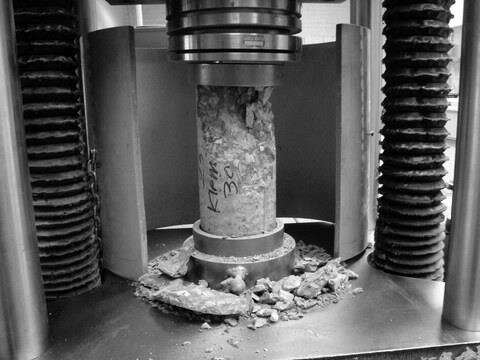
</center>


## Data Explanation

The dataset used for this project contains information on various ingredients and the age of concrete mixtures, along with the corresponding compressive strength. The goal is to predict the **Concrete Compressive Strength** based on these inputs.

### Variables

| **Variable Name**               | **Data Type** | **Measurement**        | **Description**                                               |
|----------------------------------|---------------|------------------------|---------------------------------------------------------------|
| Cement              | Quantitative  | kg in a m³ mixture     | Amount of cement in the concrete mixture.                     |
| Blast Furnace Slag  | Quantitative  | kg in a m³ mixture     | Amount of blast furnace slag in the concrete mixture.         |
| Fly Ash           | Quantitative  | kg in a m³ mixture     | Amount of fly ash in the concrete mixture.                    |
| Water             | Quantitative  | kg in a m³ mixture     | Amount of water in the concrete mixture.                      |
| Superplasticizer  | Quantitative  | kg in a m³ mixture     | Amount of superplasticizer in the concrete mixture.           |
| Coarse Aggregate   | Quantitative  | kg in a m³ mixture     | Amount of coarse aggregate in the concrete mixture.           |
| Fine Aggregate     | Quantitative  | kg in a m³ mixture     | Amount of fine aggregate in the concrete mixture.             |
| Age                              | Quantitative  | Day (1~365)            | Number of days the concrete mixture has cured.                |
| Concrete Compressive Strength    | Quantitative  | MPa                    | Output variable: The compressive strength of the concrete.     |

### Data Characteristics:

- **Number of Instances (Observations)**: 1030
- **Number of Attributes**: 9 (8 input variables and 1 output variable)
- **Missing Values**: None, the dataset is complete.
- **Data Format**: Raw, unscaled data. All variables are quantitative.
  
This dataset will be used to build models to predict the compressive strength of concrete and classify concrete mixtures based on their strength.


## Requirements

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [7]:
df=pd.read_excel("Concrete_Data.xls")

In [8]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
df.columns=['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

In [10]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## EDA (Exploratory Data Analysis)

In [12]:
df.shape

(1030, 9)

In [13]:
df.corr()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
FlyAsh,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Plasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
CoarseAgg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
FineAgg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [14]:
df.corr()["Strength"].sort_values(ascending=False)

Strength       1.000000
Cement         0.497833
Plasticizer    0.366102
Age            0.328877
Slag           0.134824
FlyAsh        -0.105753
CoarseAgg     -0.164928
FineAgg       -0.167249
Water         -0.289613
Name: Strength, dtype: float64

In [15]:
#we do not have null values
df.isnull().sum()

Cement         0
Slag           0
FlyAsh         0
Water          0
Plasticizer    0
CoarseAgg      0
FineAgg        0
Age            0
Strength       0
dtype: int64

In [16]:
df.describe()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cement       1030 non-null   float64
 1   Slag         1030 non-null   float64
 2   FlyAsh       1030 non-null   float64
 3   Water        1030 non-null   float64
 4   Plasticizer  1030 non-null   float64
 5   CoarseAgg    1030 non-null   float64
 6   FineAgg      1030 non-null   float64
 7   Age          1030 non-null   int64  
 8   Strength     1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [18]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Feature Engineering 

In [20]:
def green_classifier(df):
    """
    Use numeric data to create a Green categorical feature.
    """

    if (df.Slag+df.FlyAsh<150.0) and (df.Plasticizer<10.0):
        return "n/a"
    else:
        return "green"
df["Green"]=df.apply(green_classifier,axis=1)    

In [21]:
def strength_classifier(x):
    """
    Use numeric data to create a ConcereteClass categorical feature.
    This is based on 'CIP 35- Testing Comperessive Strength of Concerete',
    National Ready Mixed Concerete Association (www.nrmca.org), 2003&2014.
    """

    if x<17.0:
        return "non-structural"
    elif x<28.0:
        return "residental"
    elif x<70.0:
        return "commercial"
    else:
        return "high_strength"
df["ConcereteClass"]=df.Strength.apply(strength_classifier)

In [22]:
# convert Plasticizer to text (the numeric values are embedded in Green)
df['Plasticizer']=df['Plasticizer'].apply(lambda x:'yes'if x>0 else 'no')

In [23]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength,Green,ConcereteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,79.986111,n/a,high_strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,61.887366,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,40.269535,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,41.052780,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,44.296075,n/a,commercial


## Data Visualization

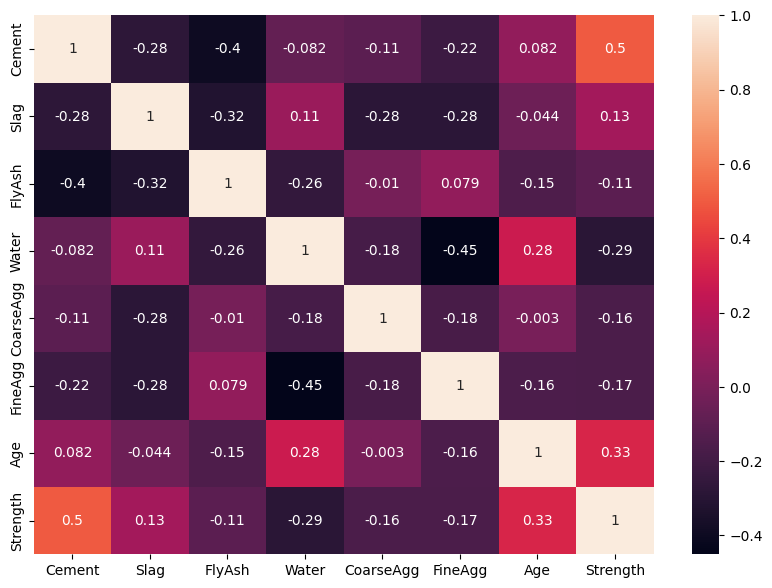

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True);

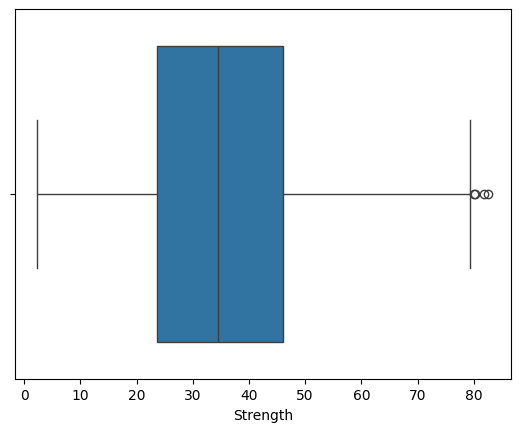

In [26]:
sns.boxplot(x=df["Strength"]);

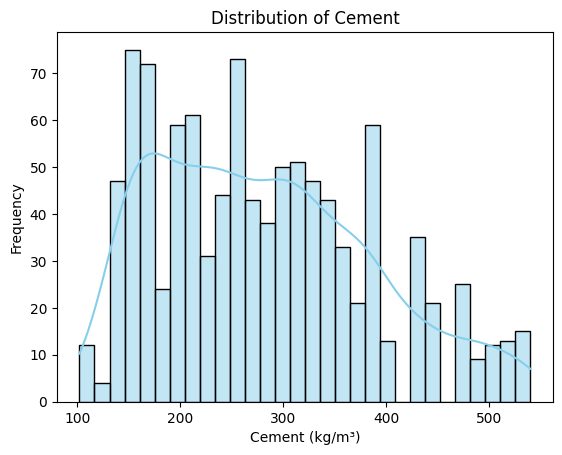

In [27]:
sns.histplot(df['Cement'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Cement')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Frequency')
plt.show()

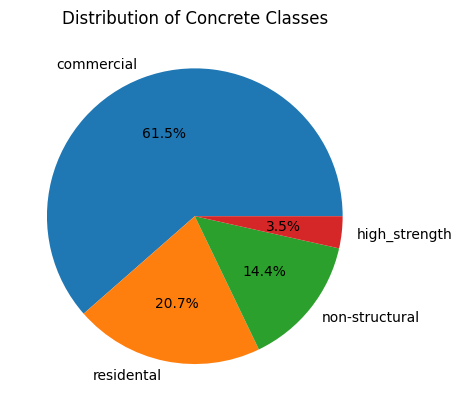

In [28]:
df['ConcereteClass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Concrete Classes')
plt.ylabel('')
plt.show()

## Modelling - Regression

In [57]:
x=df.drop(columns=["Strength"])
y=df[["Strength"]]

In [65]:
x=pd.get_dummies(x,drop_first=True)

In [67]:
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Cement,Slag,FlyAsh,Water,CoarseAgg,FineAgg,Age,Plasticizer_yes,Green_n/a,ConcereteClass_high_strength,ConcereteClass_non-structural,ConcereteClass_residental
0,2.477918,-0.856886,-0.847132,-0.916663,0.863160,-1.217658,-0.279733,0.763008,1.091554,5.254628,-0.409635,-0.510598
1,2.477918,-0.856886,-0.847132,-0.916663,1.056170,-1.217658,-0.279733,0.763008,1.091554,-0.190308,-0.409635,-0.510598
2,0.491443,0.795533,-0.847132,2.175367,-0.526514,-2.240913,3.553066,-1.310602,1.091554,-0.190308,-0.409635,-0.510598
3,0.491443,0.795533,-0.847132,2.175367,-0.526514,-2.240913,5.057677,-1.310602,1.091554,-0.190308,-0.409635,-0.510598
4,-0.790432,0.678414,-0.847132,0.488805,0.070531,0.647908,4.978487,-1.310602,1.091554,-0.190308,-0.409635,-0.510598


In [69]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

### Regression with Deep Learning

In [72]:
model=Sequential()
model.add(Dense(120,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam")

In [74]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300,verbose=0)

In [75]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [76]:
r2_score(y_test,tahmin)

0.8809687495231628

In [77]:
mean_squared_error(y_test,tahmin)**0.5

5.538240298041248

### Regression with Convolutional Machine Learning Algorithms

In [79]:

def algo_test(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Strength')
        plt.ylabel('Actual Strength')
        plt.title('Actual vs Predicted Strength for Best Model')
        plt.legend()
        plt.show()
    return r_table

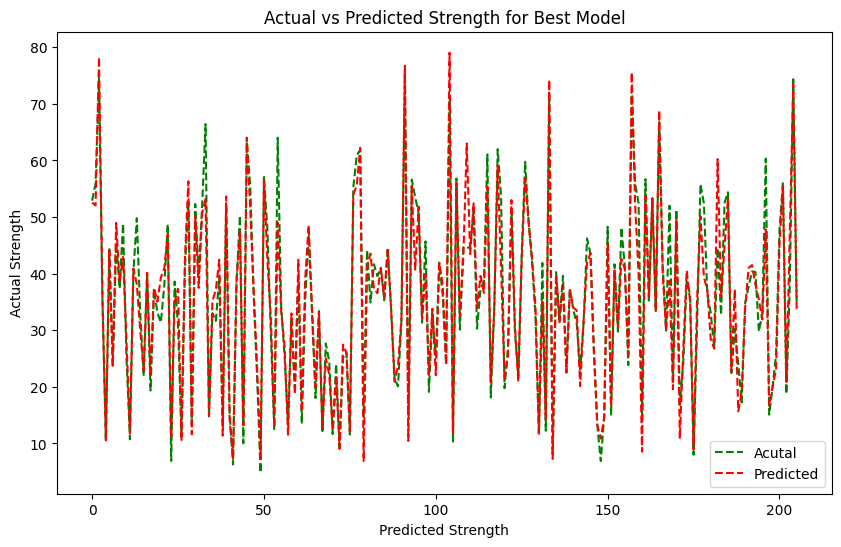

,R_Squared,RMSE,MAE
XGBReggressor,0.928382,4.295894,2.782720
Gradient Bossting,0.901005,5.050647,3.691900
DecisionTreeRegressor,0.855669,6.098482,3.808041
Extra Tree,0.830622,6.606469,4.127534
Ridge,0.806354,7.063916,5.447475
Linear,0.805923,7.071780,5.475174
KNeighborRegressor,0.736934,8.233300,6.455708
Lasso,0.688746,8.955684,6.766366
ElasticNet,0.650646,9.487989,7.386901


In [80]:
algo_test(x,y,plot=True)

## Modelling - Classification

In [82]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength,Green,ConcereteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,79.986111,n/a,high_strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,61.887366,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,40.269535,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,41.052780,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,44.296075,n/a,commercial


In [83]:
x=df.drop(["ConcereteClass","Strength"],axis=1)
y=df[["ConcereteClass"]]

In [84]:
x=pd.get_dummies(x,drop_first=True)

In [85]:
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Cement,Slag,FlyAsh,Water,CoarseAgg,FineAgg,Age,Plasticizer_yes,Green_n/a
0,2.477918,-0.856886,-0.847132,-0.916663,0.863160,-1.217658,-0.279733,0.763008,1.091554
1,2.477918,-0.856886,-0.847132,-0.916663,1.056170,-1.217658,-0.279733,0.763008,1.091554
2,0.491443,0.795533,-0.847132,2.175367,-0.526514,-2.240913,3.553066,-1.310602,1.091554
3,0.491443,0.795533,-0.847132,2.175367,-0.526514,-2.240913,5.057677,-1.310602,1.091554
4,-0.790432,0.678414,-0.847132,0.488805,0.070531,0.647908,4.978487,-1.310602,1.091554


### Classification with Deep Learning

In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['ConcereteClass'])

In [101]:
model=Sequential()
model.add(Dense(8,activation='relu')) 
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
x_train , x_test, y_train, y_test =train_test_split(x_scaled,y,test_size=.2,random_state=42)

In [105]:
x_train.shape,y_train.shape

((824, 9), (824,))

In [107]:
history=model.fit(x_train,y_train,epochs=300,batch_size=32,validation_split=.20,verbose=0)

In [108]:
history.history['accuracy'][-1] 

0.9393019676208496

In [119]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [131]:
tahmin_labels = np.argmax(tahmin, axis=1)
accuracy_score(y_test,tahmin_labels)

0.7961165048543689

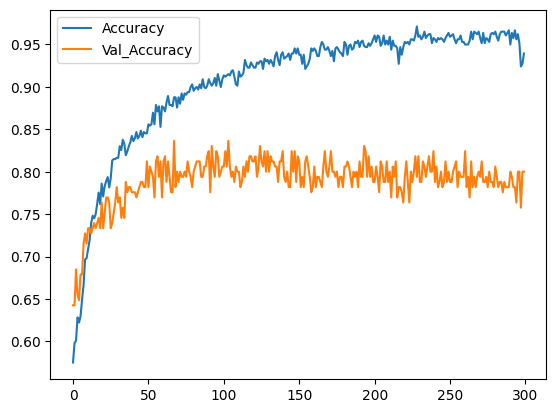

In [109]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

### Classification with Convolutional Machine Learning Algorithms

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def classification_test(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 'Decision Tree Classifier', 
                  'Random Forest Classifier', 'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p))
        classification.append(classification_report(y_test, p))

    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            plt.figure(figsize=(5, 3))  
            sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', fmt='d', 
                        xticklabels=['high_strength','commercial','residental','non-structural'], 
                        yticklabels=['high_strength','commercial','residental','non-structural'])
            plt.title(f"Confusion Matrix for {index}")
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()

    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])
        
    return r_table[['Accuracy Score']]

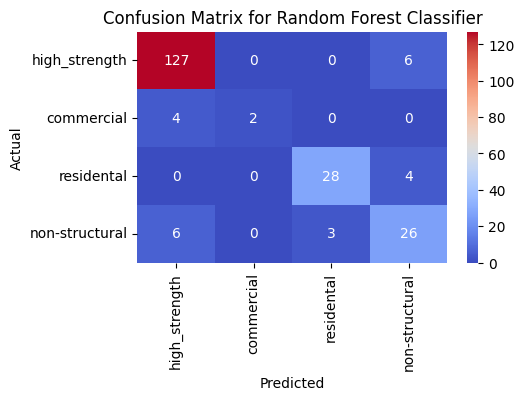

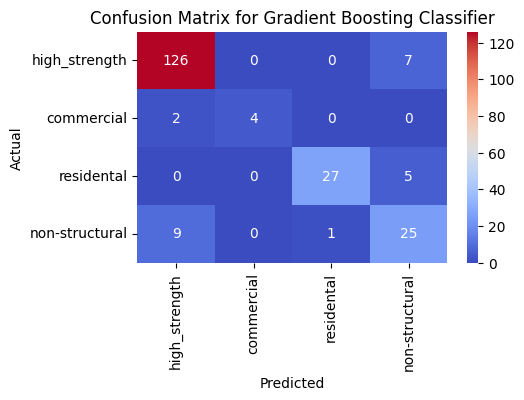

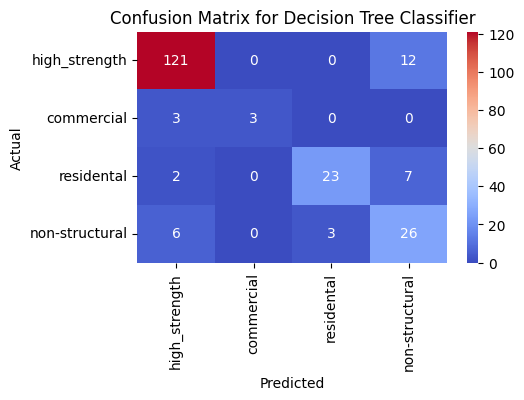

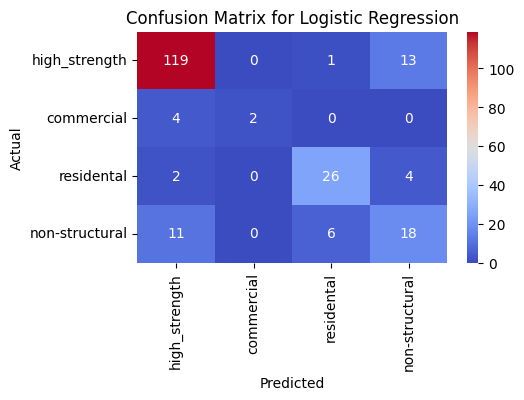

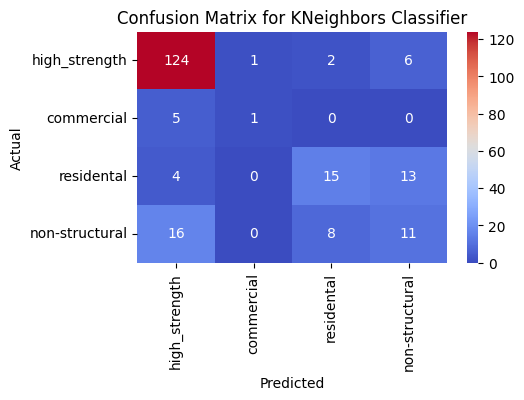

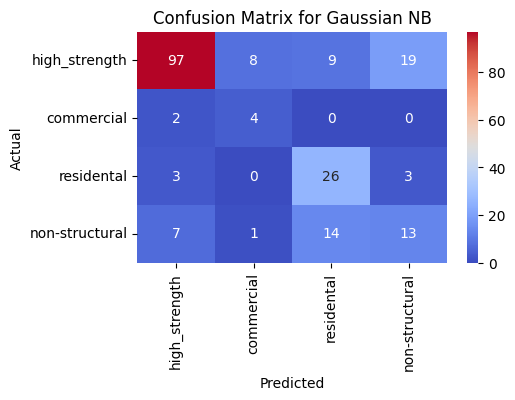

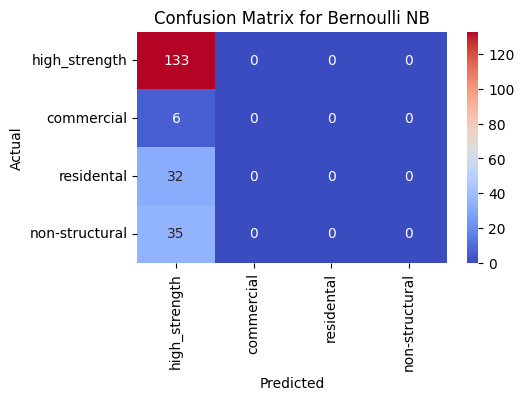

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       133
           1       1.00      0.33      0.50         6
           2       0.90      0.88      0.89        32
           3       0.72      0.74      0.73        35

    accuracy                           0.89       206
   macro avg       0.89      0.73      0.77       206
weighted avg       0.89      0.89      0.88       206

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       133
           1       1.00      0.67      0.80         6
           2       0.96      0.84      0.90        32
           3       0.68      0.71      0.69        35

    accuracy                           0.88       206
   macro avg       0.89      0.79      0.83       206
weighted avg       0.89      0.88      0.88       206

Classification Report of

,Accuracy Score
Random Forest Classifier,0.888350
Gradient Boosting Classifier,0.883495
Decision Tree Classifier,0.839806
Logistic Regression,0.800971
KNeighbors Classifier,0.733010
Gaussian NB,0.679612
Bernoulli NB,0.645631


In [112]:
classification_test(x,y,confusion_mtr=True,classification_rpt=True)

## Project Summary

This project developed two models: a **regression model** to predict concrete compressive strength and a **classification model** to predict concrete class.

#### Regression Model (Concrete Strength):
The **deep learning model** achieved an **R-squared of 0.88** and an **RMSE of 5.54**, indicating strong performance. The best traditional model was **XGBoost Regressor**, with an **R-squared of 0.93** and an **RMSE of 4.30**.

#### Classification Model (Concrete Class):
The **deep learning model** achieved an **accuracy of 79.6%**. Among traditional models, **Random Forest Classifier** performed the best with **88.8% accuracy**, followed by **Gradient Boosting Classifier** at 88.3%.

Overall, the regression model performed well with **XGBoost** being the top performer, while the classification model showed potential with **Random Forest** as the best algorithm.
